# Análisis de nacimientos de la Ciudad de Buenos Aires. 

- Fuente: https://data.buenosaires.gob.ar/dataset/nacimientos

- Descripción: Nacimientos por residencia de la madre y mes de ocurrencia según código del establecimiento donde se produjo el evento y sexo. Ocurridos y registrados en Ciudad de Buenos Aires en 2016.

- Primero vamos a importar las librerias, el dataset y analizarlo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
# Bajar los datos
data_path = 'Datasets/nacimientos.csv'
data_nacimientos = pd.read_csv(data_path,sep=';')

In [5]:
data_nacimientos.head()

,PERIODO,TIPO_RESIDENTE,RESIDENCIA_MADRE,NACIMIENTOS,SEXO_NACIDO,HOSPITAL,CALLE,ALTURA,DIRECCION_NORMALIZADA,CALLE.1,ALTURA.1,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LAT,LNG
0,ENERO,RESIDENTE,COMUNA 01,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.61459,-58.377552
1,FEBRERO,RESIDENTE,COMUNA 01,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.61459,-58.377552
2,MARZO,RESIDENTE,COMUNA 01,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.61459,-58.377552
3,ABRIL,RESIDENTE,COMUNA 01,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.61459,-58.377552
4,MAYO,RESIDENTE,COMUNA 01,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.61459,-58.377552


In [6]:
data_nacimientos.RESIDENCIA_MADRE.unique()

array(['COMUNA 01', 'COMUNA 02', 'COMUNA 03', 'COMUNA 04', 'COMUNA 05',
       'COMUNA 06', 'COMUNA 07', 'COMUNA 08', 'COMUNA 09', 'COMUNA 10',
       'COMUNA 11', 'COMUNA 12', 'COMUNA 13', 'COMUNA 14', 'COMUNA 15',
       'COMUNA DESCONOCIDA', 'OTRAS PROVINCIAS', 'OTROS PAÍSES',
       'RESIDENCIA DESCONOCIDA'], dtype=object)

In [7]:
data_nacimientos.TIPO_RESIDENTE.unique()

array(['RESIDENTE', 'OTRAS PROVINCIAS', 'OTROS PAÍSES',
       'RESIDENCIA DESCONOCIDA'], dtype=object)

En algunos atributos aparece la palabra desconocida (similar al nan), analicemos cuantas veces aparecen en dichos atributos.

In [8]:
def desc_in(elemento):
    if type(elemento) == str:
        if 'DESC' in elemento:
            return True
    else:
        return False

Para esto vamos a usar la función applymap. Les parece conocida?

In [9]:
aux = data_nacimientos.applymap(lambda x: desc_in(x))
aux.sum()

PERIODO                       0.0
TIPO_RESIDENTE             1992.0
RESIDENCIA_MADRE           3984.0
NACIMIENTOS                   0.0
SEXO_NACIDO                   0.0
HOSPITAL                    904.0
CALLE                         0.0
ALTURA                        0.0
DIRECCION_NORMALIZADA         0.0
CALLE.1                       0.0
ALTURA.1                      0.0
BARRIO                        0.0
COMUNA                        0.0
CODIGO_POSTAL                 0.0
CODIGO_POSTAL_ARGENTINO       0.0
LAT                           0.0
LNG                           0.0
dtype: float64

In [10]:
aux.sum(axis = 1).values > 0

array([False, False, False, ...,  True,  True,  True])

In [11]:
data_nacimientos[aux.sum(axis = 1).values>0]

,PERIODO,TIPO_RESIDENTE,RESIDENCIA_MADRE,NACIMIENTOS,SEXO_NACIDO,HOSPITAL,CALLE,ALTURA,DIRECCION_NORMALIZADA,CALLE.1,ALTURA.1,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LAT,LNG
180,ENERO,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
181,FEBRERO,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
182,MARZO,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
183,ABRIL,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
184,MAYO,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
185,JUNIO,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
186,JULIO,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
187,AGOSTO,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
188,SEPTIEMBRE,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552
189,OCTUBRE,RESIDENTE,COMUNA DESCONOCIDA,0,VARON,AGHALMA SA,PIEDRAS,547.0,PIEDRAS 547,PIEDRAS,547.0,MONSERRAT,COMUNA 01,1070.0,C1070AAK,-34.614590,-58.377552


# a. Conociendo el Dataset
### Cargar el dataset de nacimientos de la Ciudad de Buenos Aires y responder:

1. ¿Cuántos y qué features tenemos? ¿Cuántas filas?
1. ¿Cuál es el valor que puede tomar cada feature? ¿Cuáles te parecen del mismo **tipo** y cuáles distintos?
1. ¿Cuántos **NaNs** hay en cada feature? ¿Y cuántas entradas desconocidas? ¿Te parece que estas entradas nos dan información? Detallá qué información dan en cada caso.
1. ¿Te parece que hay **información repetida**? ¿En qué casos?

In [12]:
# Ayuda
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(data_nacimientos)

,Total,Percent
LNG,904,0.024096
ALTURA.1,904,0.024096
CALLE,904,0.024096
ALTURA,904,0.024096
LAT,904,0.024096
CALLE.1,904,0.024096
DIRECCION_NORMALIZADA,904,0.024096
BARRIO,904,0.024096
COMUNA,904,0.024096
CODIGO_POSTAL,904,0.024096


In [25]:
#1
print("filas {}" .format(data_nacimientos.shape[0]))
print(data_nacimientos.columns)

filas 37516
Index(['PERIODO', 'TIPO_RESIDENTE', 'RESIDENCIA_MADRE', 'NACIMIENTOS',
       'SEXO_NACIDO', 'HOSPITAL', 'CALLE', 'ALTURA', 'DIRECCION_NORMALIZADA  ',
       'CALLE.1', 'ALTURA.1', 'BARRIO', 'COMUNA', 'CODIGO_POSTAL',
       'CODIGO_POSTAL_ARGENTINO', 'LAT', 'LNG'],
      dtype='object')


In [46]:
#¿Cuál es el valor que puede tomar cada feature? ¿Cuáles te parecen del mismo tipo y cuáles distintos?
data_nacimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37516 entries, 0 to 37515
Data columns (total 17 columns):
PERIODO                    37516 non-null object
TIPO_RESIDENTE             37516 non-null object
RESIDENCIA_MADRE           37516 non-null object
NACIMIENTOS                37516 non-null int64
SEXO_NACIDO                37516 non-null object
HOSPITAL                   37516 non-null object
CALLE                      36612 non-null object
ALTURA                     36612 non-null float64
DIRECCION_NORMALIZADA      36612 non-null object
CALLE.1                    36612 non-null object
ALTURA.1                   36612 non-null float64
BARRIO                     36612 non-null object
COMUNA                     36612 non-null object
CODIGO_POSTAL              36612 non-null float64
CODIGO_POSTAL_ARGENTINO    36612 non-null object
LAT                        36612 non-null float64
LNG                        36612 non-null float64
dtypes: float64(5), int64(1), object(11)
memory usage:

In [53]:
#¿Cuántos NaNs hay en cada feature? ¿Y cuántas entradas desconocidas? ¿Te parece que estas entradas nos dan información? 
#Detallá qué información dan en cada caso.
data_nacimientos.isnull().any()

data_nacimientos.empty 

False

In [61]:
#¿Te parece que hay información repetida? ¿En qué casos?
aux = data_nacimientos.duplicated()
aux
data_nacimientos[aux]


,PERIODO,TIPO_RESIDENTE,RESIDENCIA_MADRE,NACIMIENTOS,SEXO_NACIDO,HOSPITAL,CALLE,ALTURA,DIRECCION_NORMALIZADA,CALLE.1,ALTURA.1,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LAT,LNG
18533,FEBRERO,RESIDENTE,COMUNA 01,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18534,MARZO,RESIDENTE,COMUNA 01,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18535,ABRIL,RESIDENTE,COMUNA 01,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18537,JUNIO,RESIDENTE,COMUNA 01,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18538,JULIO,RESIDENTE,COMUNA 01,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18541,OCTUBRE,RESIDENTE,COMUNA 01,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18542,NOVIEMBRE,RESIDENTE,COMUNA 01,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18544,ENERO,RESIDENTE,COMUNA 02,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18545,FEBRERO,RESIDENTE,COMUNA 02,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18548,MAYO,RESIDENTE,COMUNA 02,0,VARON,DESCONOCIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# b. Análisis de nacimientos por mes en CABA.

### Responder las siguientes preguntas:
No olvides de mostrar el razonamiento que utilizaste. Te será útil el link https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html. No te olvides de las máscaras y la función group_by. 

1. ¿Cuántos nacimientos hay en un año en CABA? ¿Cuántas mujeres y cuántos varones? 
1. ¿Cuántos nacimientos hay por mes en caba? ¿Cuál es el mes con más nacimientos y cuál es el mes con menos? ¿Son los mismos meses si consideramos solamente las mujeres nacidas? Te sugerimos realizar un histograma para mostrar los resultados. 
1. ¿Cuántos nacimientos hay en promedio en CABA? Te sugerimos realizar un boxplot para mostrar los resultados.
1. ¿Cuántos nacimientos hay en CABA cuya madre vive fuera de Capital Federal?
1. ¿Cuántos nacimientos hay en CABA cuya madre es extranjera?

In [62]:
print('Total de nacidos: ', data_nacimientos.NACIMIENTOS.sum())

data_nacimientos_mujeres = data_nacimientos[data_nacimientos.SEXO_NACIDO=='MUJER']
data_nacimientos_varones = data_nacimientos[data_nacimientos.SEXO_NACIDO=='VARON']

print('Total de varones: ', data_nacimientos_mujeres.NACIMIENTOS.sum())
print('Total de mujeres: ',data_nacimientos_varones.NACIMIENTOS.sum())

Total de nacidos:  69995
Total de varones:  34270
Total de mujeres:  35725


In [63]:
grouped = data_nacimientos.groupby(['SEXO_NACIDO','PERIODO'])
suma_nacimientos = grouped['NACIMIENTOS'].sum()
print(dict(suma_nacimientos))

{('MUJER', 'ABRIL'): 3104, ('MUJER', 'AGOSTO'): 3097, ('MUJER', 'DICIEMBRE'): 914, ('MUJER', 'ENERO'): 3029, ('MUJER', 'FEBRERO'): 2949, ('MUJER', 'JULIO'): 3058, ('MUJER', 'JUNIO'): 3107, ('MUJER', 'MARZO'): 3381, ('MUJER', 'MAYO'): 3182, ('MUJER', 'NOVIEMBRE'): 2600, ('MUJER', 'OCTUBRE'): 2899, ('MUJER', 'SEPTIEMBRE'): 2950, ('VARON', 'ABRIL'): 3189, ('VARON', 'AGOSTO'): 3260, ('VARON', 'DICIEMBRE'): 1002, ('VARON', 'ENERO'): 3331, ('VARON', 'FEBRERO'): 3153, ('VARON', 'JULIO'): 3149, ('VARON', 'JUNIO'): 3115, ('VARON', 'MARZO'): 3452, ('VARON', 'MAYO'): 3241, ('VARON', 'NOVIEMBRE'): 2701, ('VARON', 'OCTUBRE'): 3002, ('VARON', 'SEPTIEMBRE'): 3130}


In [64]:
nacimientos_sexo_periodo = [
    {'SEXO_NACIDO': sexo, 'PERIODO': mes, 'NACIMIENTOS': numero} for 
    (sexo, mes), numero in dict(suma_nacimientos).items()]
df_nacimientos_sexo_periodo = pd.DataFrame(nacimientos_sexo_periodo)
display(df_nacimientos_sexo_periodo)

,NACIMIENTOS,PERIODO,SEXO_NACIDO
0,3104,ABRIL,MUJER
1,3097,AGOSTO,MUJER
2,914,DICIEMBRE,MUJER
3,3029,ENERO,MUJER
4,2949,FEBRERO,MUJER
5,3058,JULIO,MUJER
6,3107,JUNIO,MUJER
7,3381,MARZO,MUJER
8,3182,MAYO,MUJER
9,2600,NOVIEMBRE,MUJER


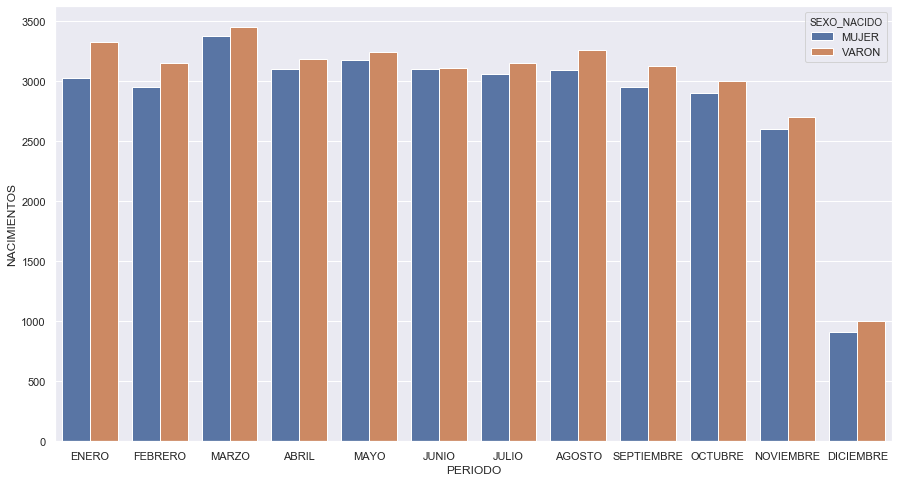

In [66]:
order = ['ENERO', 'FEBRERO', 'MARZO','ABRIL',  'MAYO', 'JUNIO', 'JULIO','AGOSTO', 'SEPTIEMBRE',
         'OCTUBRE','NOVIEMBRE', 'DICIEMBRE']
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="PERIODO", y="NACIMIENTOS", hue="SEXO_NACIDO", data=df_nacimientos_sexo_periodo,order = order)

plt.show()


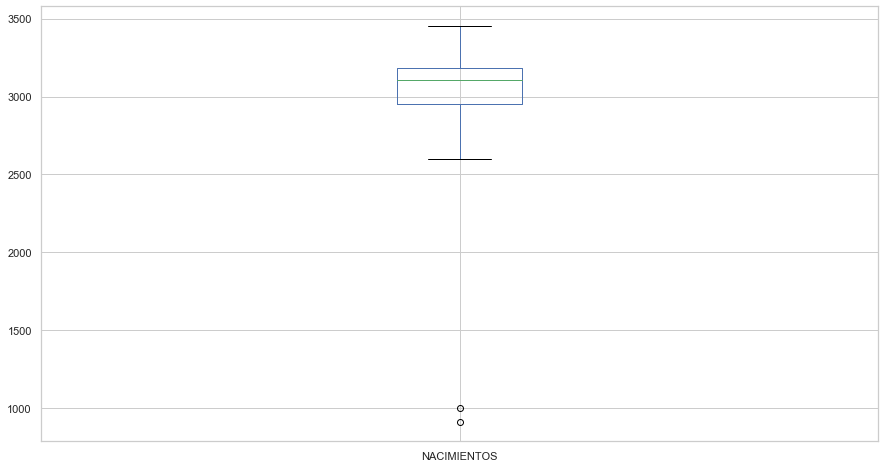

In [78]:

df_nacimientos_sexo_periodo.boxplot()

# c. Análisis geográfico de nacimientos por mes en CABA.


### Realizar:
Realizá un heatmap donde muestre la cantidad de nacimientos por mes para cada comuna. ¿Qué conclusiones podés sacar de ese plot? Te será útil el link https://seaborn.pydata.org/generated/seaborn.heatmap.html. No olvides que podés crear un nuevo dataframe para ingresar como argumento del heatmap, en donde sólamente estén los features necesarios para graficar.

### Responder:
1. ¿Cuál es el total de nacimientos por comuna? 
1. ¿Cuál es el promedio de nacimientos por comuna? Te sugerimos realizar un boxplot para responder a esta pregunta. 
1. ¿Cuál es el porcentaje de nacimientos por comuna? Te recomendamos realizar un pointplot para responder a esta pregunta.


In [129]:
grouped = data_nacimientos.groupby(['COMUNA','PERIODO'])
suma_nacimientos = grouped['NACIMIENTOS'].sum()


In [120]:
grouped = data_nacimientos.groupby(['COMUNA','PERIODO'])
suma_nacimientos = grouped['NACIMIENTOS'].sum()

nacimientos_comuna_periodo = [{'COMUNA': sexo, 'PERIODO': mes, 'NACIMIENTOS': numero} 
                            for (sexo, mes), numero in dict(suma_nacimientos).items()]
df_nacimientos_comuna_periodo = pd.DataFrame(nacimientos_comuna_periodo)

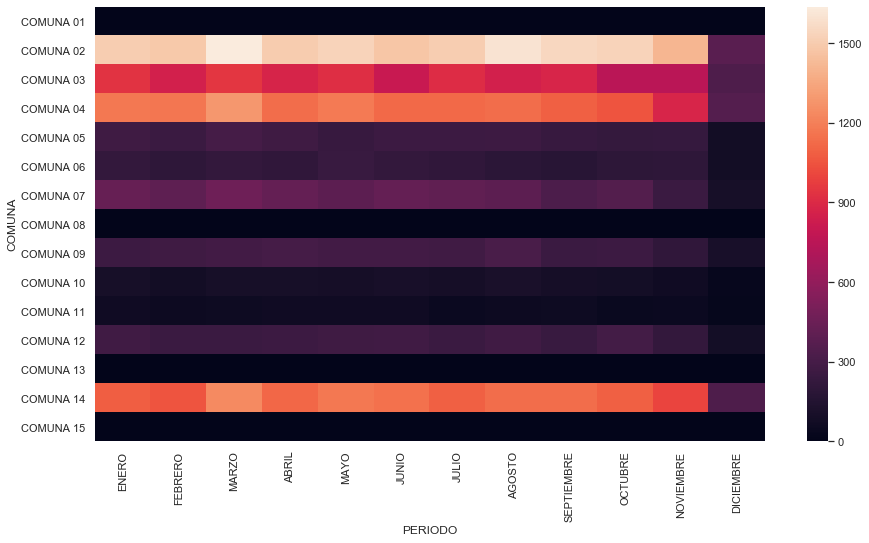

In [121]:
df_nacimientos_comuna_periodo['PERIODO'] = pd.Categorical(df_nacimientos_comuna_periodo['PERIODO'], ['ENERO', 'FEBRERO', 
                                          'MARZO','ABRIL',  'MAYO', 'JUNIO', 'JULIO','AGOSTO', 'SEPTIEMBRE','OCTUBRE','NOVIEMBRE', 'DICIEMBRE'])
df_nacimientos_comuna_periodo.sort_values("PERIODO")

mapa = df_nacimientos_comuna_periodo.pivot( "COMUNA","PERIODO","NACIMIENTOS")
ax = sns.heatmap(mapa)

1-¿Todos los features te parecieron necesarios para estimar el porcentaje de nacimiento por comuna? ¿Qué features descartarías? ¿Agregarías nuevas columnas? ¿por qué?

2-¿Descartarías todas las celdas que tienen valores faltantes? ¿Cómo los convertirías en features informativos?. Les proponemos utilizar el imputer de Scikit-learn para reemplazar los valores faltantes con algún indicador estadístico. Por ejemplo, en la columna "altura" podemos reemplazar los valores faltantes por la mediana (les parece correcta esta elección?).

3- Cambiar en la columna periodo del mes por su correspondiente en valor númerico.

4- Como podríamos tranformar el nombre deL Hospital? Realizar dicha conversión de variable.

5- La mayoría de los features que se utilizan como entrada a modelos de Machine Learning tienen un valor numérico. ¿Cómo convertirías a cada feature en un valor numérico?. Como ejemplo, vamos a Transformar la categorías SEXO_NACIDO en binarias.

6- Hacer un box plot y displot de CODIGO_POSTAL, y analizar si hay OUTLIER. Cómo los eliminaria? Cumple el supuesto de normalidad? Cómo lo verificarias? Qué paso previo debo hacer para eliminar los OUTLIER?

7- Como podríamos tranformar el nombre del atributo COMUNA? Si desea usar OneHotEncoeder que paso previo deberían realizar?

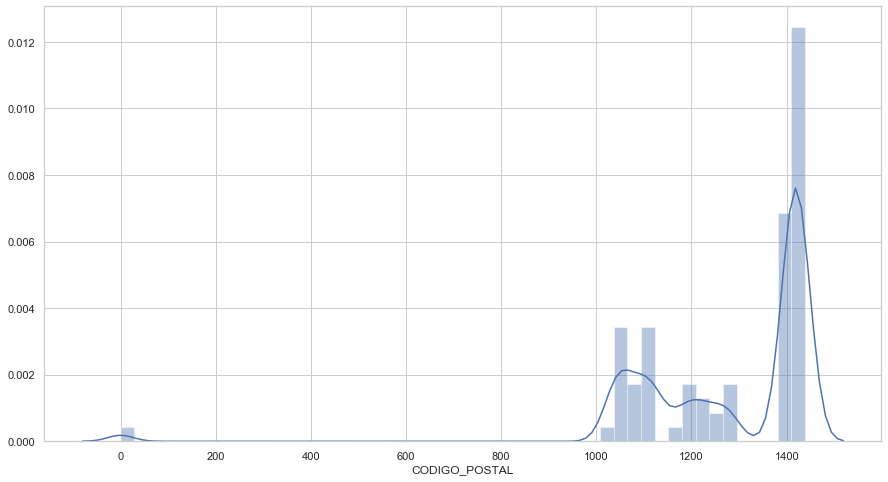

In [142]:
aaa = data_nacimientos['CODIGO_POSTAL'].dropna()
aa = pd.Series(aaa, name="CODIGO_POSTAL")
ax = sns.distplot(aa)